**Example 2**

Bank Customer Exit Prediction.

Based on given data using Neural Network Binary Classifier find out is a customer going to stay or leave stay: (Churn=0) and leave (churn=1)

Predict the result for new data as well at end

In [1]:
import numpy as np, pandas as pd, tensorflow as tf,matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('/content/bank_churn.csv')
data

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,EstimatedSalary,Exited
0,600,France,Male,40,60000,1,50000,0
1,700,Spain,Female,45,70000,2,60000,0
2,800,Germany,Female,38,80000,1,70000,1
3,400,France,Male,30,30000,1,40000,1
4,550,Spain,Male,50,40000,2,42000,0
5,760,France,Female,36,75000,1,72000,0
6,680,Germany,Female,42,68000,2,65000,1
7,710,Spain,Male,39,72000,1,54000,0
8,640,France,Male,48,50000,2,50000,1
9,590,Germany,Female,52,45000,1,47000,1


In [3]:
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data=pd.get_dummies (data, columns=['Geography'])

In [4]:
x = data.drop('Exited', axis=1)
y = data['Exited']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu',input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305 (1.19 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(x_train,y_train,epochs=100,verbose=0, validation_data=(x_test, y_test))

In [10]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [11]:
loss, accuracy = model.evaluate(x_test,y_test)
print(f"loss:{loss:.2f} and accuracy:{accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.3071
loss:0.31 and accuracy:1.0


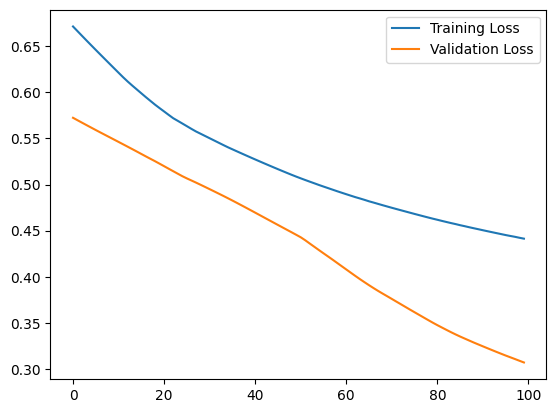

In [12]:
plt.plot(history.history ["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [13]:
new_data=pd.DataFrame({"CreditScore": [600],
                        "Geography": ['France'],
                        "Gender": ['Male'],
                        "Age": [40],
                        "Balance": [50000],
                        "NumOfProducts": [1],
                        "EstimatedSalary": [60000]})

new_data['Gender']=le.transform(new_data['Gender'])
new_data=pd.get_dummies(new_data, columns=['Geography'])

# Add missing dummy columns
for col in [c for c in x.columns if c not in new_data.columns]:
      new_data [col] = 0

new_customer = new_data[x.columns] # same order
new_scaled = scalar.transform(new_customer)


predicted_exit=model.predict(new_scaled)
if predicted_exit[0][0] > 0.5:
  print("Customer will leave")
  print(round(predicted_exit[0][0]))
else:
  print("Customer will not leave")
  print(round(predicted_exit[0][0]))
# print("Predicted Exit (0 for stay, 1 for leave):", round (predicted_exit[0][0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Customer will not leave
0
